In [1]:
!pip install labelme

In [204]:
!pip install tensorflow opencv-python matplotlib albumentations

In [1]:
!pip install opencv-python --upgrade

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = r'C:\Users\Sai Gayathri\Documents\wild animal detection\images' 
number_images = 30

In [4]:
cap = cv2.VideoCapture('Wild Animals Invading Neighbourhoods (1) (online-video-cutter.com).mp4')
imgnum = 0

while True:
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()

    if not ret:
        # Break the loop if we've reached the end of the video
        break

    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')

    # Save the frame as an image
    cv2.imwrite(imgname, frame)
    imgnum += 1

# Release the video capture
cap.release()
cv2.destroyAllWindows()

In [10]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Sai Gayathri\.labelmerc


In [11]:
!pip install tensorflow

In [27]:
pip cache purge

Files removed: 162Note: you may need to restart the kernel to use updated packages.



In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
images = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\images\\*.jpg', shuffle= False)

In [7]:
images.as_numpy_iterator().next()

b'C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\images\\3281f301-6775-11ee-956a-c03c597f85a9.jpg'

In [8]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[147, 107,  58],
        [147, 107,  58],
        [147, 107,  58],
        ...,
        [ 75,  86, 108],
        [ 74,  85, 107],
        [ 74,  85, 107]],

       [[147, 107,  58],
        [147, 107,  58],
        [147, 107,  58],
        ...,
        [ 74,  85, 107],
        [ 74,  85, 107],
        [ 74,  85, 107]],

       [[146, 108,  61],
        [146, 108,  61],
        [146, 108,  61],
        ...,
        [ 75,  86, 108],
        [ 75,  86, 108],
        [ 75,  86, 108]],

       ...,

       [[148, 109,  70],
        [148, 109,  70],
        [150, 108,  70],
        ...,
        [153, 158, 164],
        [155, 160, 166],
        [143, 148, 154]],

       [[148, 109,  70],
        [148, 109,  70],
        [150, 108,  70],
        ...,
        [147, 152, 158],
        [145, 150, 156],
        [148, 153, 159]],

       [[150, 111,  72],
        [150, 111,  72],
        [152, 110,  72],
        ...,
        [153, 158, 164],
        [147, 152, 158],
        [141, 146, 152]]

In [11]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [12]:
image_generator = images.batch(4).as_numpy_iterator()

In [13]:
plot_images = image_generator.next()

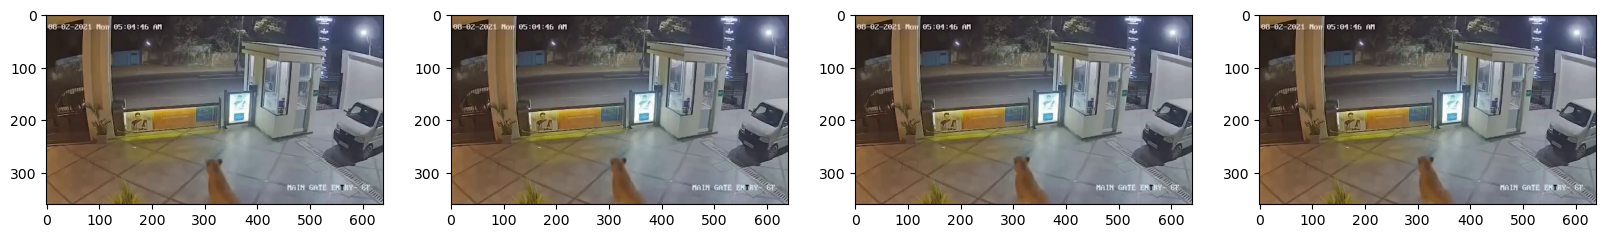

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [46]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

# Apply Image Augmentation on Images and Labels using Albumentations

In [24]:
!pip install albumentations --user

In [25]:
import albumentations as alb

In [26]:
augmentor = alb.Compose([alb.RandomCrop(width=640, height=360), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))


In [27]:
img = cv2.imread(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection','train', 'images','b6a1c91f-653a-11ee-84b1-c03c597f85a9.jpg'))

In [28]:
with open(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection','train', 'labels', 'b6a1c91f-653a-11ee-84b1-c03c597f85a9.json'), 'r') as f:
    label = json.load(f)

In [29]:
label['shapes'][0]['points']

[[298.95833333333337, 269.1666666666667], [375.4830246913581, 359.0]]

## Extract Coordinates and Rescale to Match Image Resolution

In [30]:
bbox_x_min = label['shapes'][0]['points'][0][0]
bbox_y_min = label['shapes'][0]['points'][0][1]
bbox_x_max = label['shapes'][0]['points'][1][0]
bbox_y_max = label['shapes'][0]['points'][1][1]

In [31]:
coords = [bbox_x_min, bbox_y_min, bbox_x_max, bbox_y_max]

In [32]:
coords = list(np.divide(coords, [640, 360, 640, 360]))

In [33]:
coords

[0.46712239583333337,
 0.7476851851851852,
 0.586692226080247,
 0.9972222222222222]

In [34]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['wild_animal'])

In [35]:
augmented_bbox = augmented['bboxes'][0]

In [36]:
augmented_image = augmented['image']

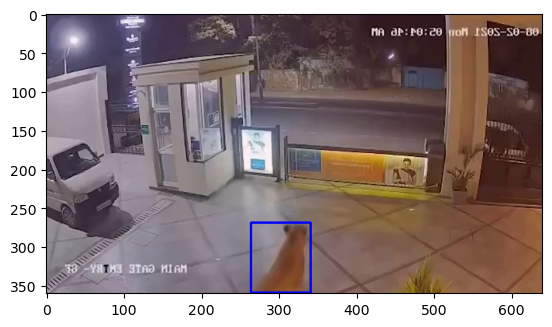

In [37]:
cv2.rectangle(augmented_image,
              (int(augmented_bbox[0] * 640), int(augmented_bbox[1] * 360)),
              (int(augmented_bbox[2] * 640), int(augmented_bbox[3] * 360)),
              (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection', partition, 'images')):
        img = cv2.imread(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            bbox_x_min = label['shapes'][0]['points'][0][0]
            bbox_y_min = label['shapes'][0]['points'][0][1]
            bbox_x_max = label['shapes'][0]['points'][1][0]
            bbox_y_max = label['shapes'][0]['points'][1][1]
            coords = [bbox_x_min, bbox_y_min, bbox_x_max, bbox_y_max]
            coords = list(np.divide(coords, [640,360,640,360]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['wild_animal'])
                cv2.imwrite(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection','aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('C:\\Users\\Sai Gayathri\\Documents','wild animal detection','aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [15]:
train_images = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [16]:
test_images = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [17]:
val_images = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [18]:
train_images.as_numpy_iterator().next()

array([[[0.7588235 , 0.66862744, 0.7470588 ],
        [0.59607846, 0.49803922, 0.58431375],
        [0.79019606, 0.6764706 , 0.7862745 ],
        ...,
        [0.7137255 , 0.43529412, 0.3254902 ],
        [0.7372549 , 0.4509804 , 0.33529413],
        [0.75686276, 0.45490196, 0.34509805]],

       [[0.7254902 , 0.6313726 , 0.7176471 ],
        [0.7588235 , 0.65882355, 0.7509804 ],
        [0.6202614 , 0.5183006 , 0.62418294],
        ...,
        [0.7176471 , 0.4392157 , 0.32941177],
        [0.73137254, 0.44509804, 0.32941177],
        [0.7529412 , 0.4509804 , 0.34117648]],

       [[0.74379086, 0.6496732 , 0.7359477 ],
        [0.39411765, 0.29607844, 0.3882353 ],
        [0.617647  , 0.5156862 , 0.62156856],
        ...,
        [0.73267967, 0.4503267 , 0.3522875 ],
        [0.7352941 , 0.4490196 , 0.33333334],
        [0.74182993, 0.43986914, 0.3300652 ]],

       ...,

       [[0.4084967 , 0.3339869 , 0.5104575 ],
        [0.42156863, 0.34705883, 0.5235294 ],
        [0.42745098, 0

In [19]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [20]:
train_labels = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [21]:
test_labels = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [22]:
val_labels = tf.data.Dataset.list_files('C:\\Users\\Sai Gayathri\\Documents\\wild animal detection\\aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [23]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4177  , 0.003471, 0.5356  , 0.2568  ], dtype=float16))

In [24]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [25]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [26]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [27]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [28]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3838 , 0.545  , 0.5015 , 0.881  ],
        [0.5347 , 0.337  , 0.603  , 0.5786 ],
        [0.5356 , 0.12384, 0.6177 , 0.463  ],
        [0.3376 , 0.2754 , 0.454  , 0.3958 ],
        [0.569  , 0.279  , 0.669  , 0.3994 ],
        [0.3826 , 0.537  , 0.4646 , 0.876  ],
        [0.469  , 0.02663, 0.6235 , 0.397  ],
        [0.546  , 0.2407 , 0.6177 , 0.5635 ]], dtype=float16))

In [29]:
data_samples = train.as_numpy_iterator()

In [30]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


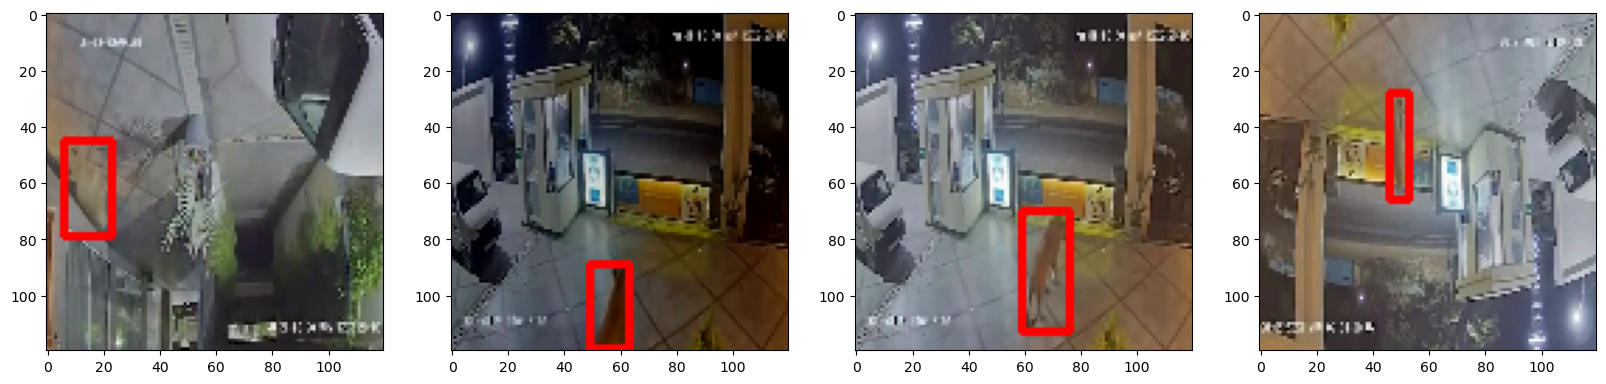

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [33]:
vgg = VGG16(include_top=False)

In [34]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [35]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    animaldetector = Model(inputs=input_layer, outputs=[class2, regress2])
    return animaldetector

In [36]:
animaldetector = build_model()

In [37]:
animaldetector.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [38]:
X, y = train.as_numpy_iterator().next()

In [39]:
X.shape

(8, 120, 120, 3)

In [40]:
classes, coords = animaldetector.predict(X)

1/1 [==============================] - 0s 329ms/step


In [41]:
classes, coords

(array([[0.75334096],
        [0.761583  ],
        [0.75009644],
        [0.75500596],
        [0.7133907 ],
        [0.72985184],
        [0.76201963],
        [0.7643221 ]], dtype=float32),
 array([[0.48578146, 0.403665  , 0.5643529 , 0.35848615],
        [0.516296  , 0.3526008 , 0.5971277 , 0.39078996],
        [0.47697008, 0.38483137, 0.5869987 , 0.3976599 ],
        [0.4887683 , 0.3803587 , 0.5981923 , 0.41056922],
        [0.49385208, 0.3607626 , 0.55868465, 0.39789557],
        [0.53279877, 0.30505404, 0.5491668 , 0.40193343],
        [0.52019095, 0.3437492 , 0.60124123, 0.3825484 ],
        [0.49019983, 0.34930596, 0.623796  , 0.35166416]], dtype=float32))

In [42]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [43]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [44]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [45]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [46]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1953841>

In [47]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.2896705>

In [48]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1953841>

In [49]:
class AnimalDetector(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [50]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense

In [51]:
model = AnimalDetector(animaldetector)

In [52]:
model.compile(opt, classloss, regressloss)

In [53]:
logdir='logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 384s 801ms/step - total_loss: 0.1264 - class_loss: 0.0053 - regress_loss: 0.1238 - val_total_loss: 0.0178 - val_class_loss: 1.1474e-06 - val_regress_loss: 0.0178
Epoch 2/10
473/473 [==============================] - 378s 793ms/step - total_loss: 0.0155 - class_loss: 6.0859e-06 - regress_loss: 0.0155 - val_total_loss: 0.0023 - val_class_loss: 8.6427e-07 - val_regress_loss: 0.0023
Epoch 3/10
473/473 [==============================] - 400s 837ms/step - total_loss: 0.0055 - class_loss: 2.0544e-06 - regress_loss: 0.0055 - val_total_loss: 0.0020 - val_class_loss: 2.5481e-06 - val_regress_loss: 0.0020
Epoch 4/10
473/473 [==============================] - 405s 850ms/step - total_loss: 0.0036 - class_loss: 1.2187e-06 - regress_loss: 0.0036 - val_total_loss: 0.0022 - val_class_loss: 1.5497e-06 - val_regress_loss: 0.0022
Epoch 5/10
473/473 [==============================] - 399s 838ms/step - total_loss: 0.0025 - class_loss: 7.5276e-07 - regres

In [56]:
hist.history

{'total_loss': [0.015156542882323265,
  0.0011807288974523544,
  0.0014909333549439907,
  0.0007378293666988611,
  0.0017842869274318218,
  0.001471634255722165,
  0.00022285514569375664,
  0.0006004164461046457,
  0.00046567924437113106,
  0.00036905676824972034],
 'class_loss': [1.3187845070206095e-05,
  9.834784577833489e-07,
  4.470348713425665e-08,
  8.195651730602549e-07,
  3.576281244477286e-07,
  5.215411533754377e-07,
  5.513434189197142e-07,
  5.811459118376661e-07,
  0.0,
  0.0],
 'regress_loss': [0.015149949118494987,
  0.0011802371591329575,
  0.0014909110032022,
  0.0007374195847660303,
  0.0017841081134974957,
  0.0014713734854012728,
  0.00022257947421167046,
  0.0006001258734613657,
  0.00046567924437113106,
  0.00036905676824972034],
 'val_total_loss': [0.017759911715984344,
  0.002298707375302911,
  0.0019977118354290724,
  0.0021988314110785723,
  0.0024233628064393997,
  0.0013619816163554788,
  0.0011510257609188557,
  0.0012009532656520605,
  0.001839656149968505

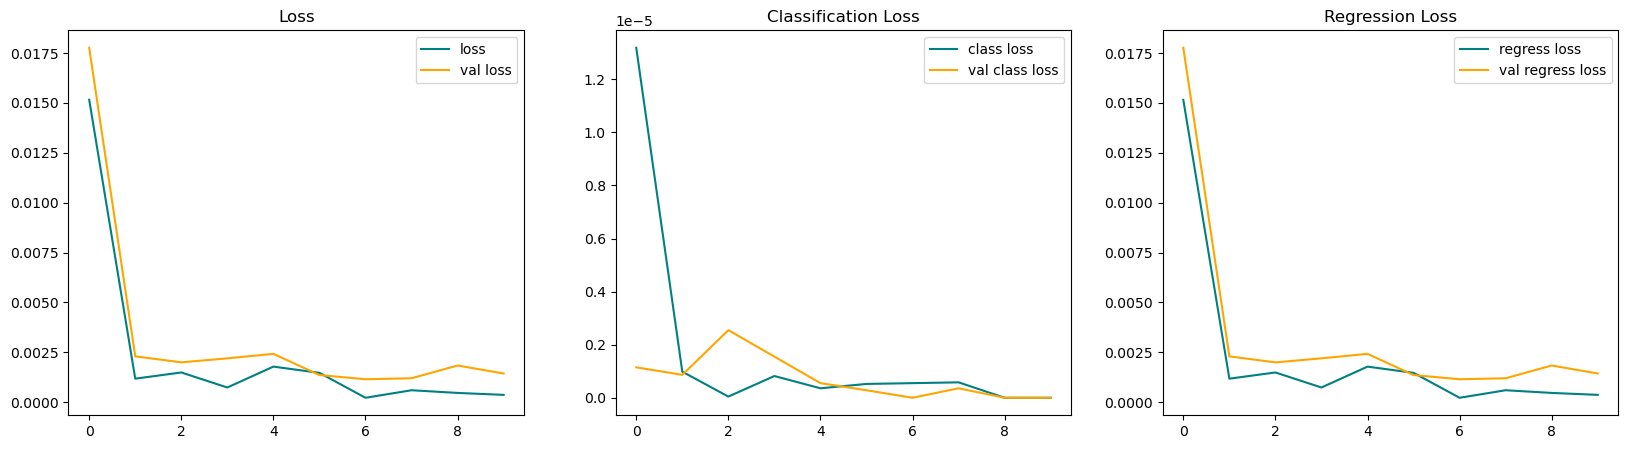

In [57]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [58]:
test_data = test.as_numpy_iterator()

In [59]:
test_sample = test_data.next()

In [60]:
yhat = animaldetector.predict(test_sample[0])

1/1 [==============================] - 0s 174ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


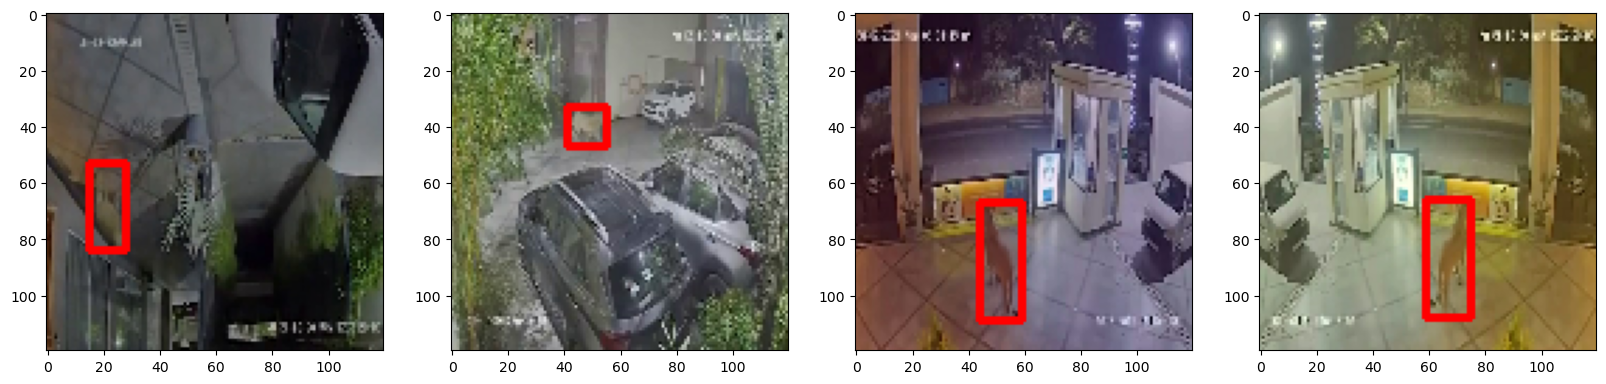

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if np.any(yhat[0][idx] > 0.9):
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [62]:
from tensorflow.keras.models import load_model

In [63]:
animaldetector.save('animaldetector.keras')

In [64]:
animaldetector = load_model('animaldetector.keras')

In [70]:
cap = cv2.VideoCapture('pexels-zlatin-georgiev-5607649 (2160p).mp4')
while cap.isOpened():
    
    ret, frame = cap.read()
    
    if not ret:
        break  # Break out of the loop when there are no more frames

    frame = frame[50:500, 50:500, :]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = animaldetector.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'wild animal', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('Wild animal', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 63ms/step
